In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score ,classification_report 
from sklearn.preprocessing import StandardScaler ,LabelEncoder,OneHotEncoder
from sklearn.decomposition import PCA


![alt text](image.png)

# Data Exploration

In [359]:
data=pd.read_csv("music_dataset_mod.csv")
data


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,NaN
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [360]:
# Testing row 992 متبصيش عليه يا سارة مش مهم 
scaler=StandardScaler()
row=data.iloc[[992]]
rf=row.drop(["Genre","Distorted Guitar"],axis=1)
rf_std=scaler.fit_transform(rf)

In [361]:
data.isnull().sum()

Tempo                            0
Dynamics Range                   0
Vocal Presence                   0
Percussion Strength              0
String Instrument Detection      0
Electronic Element Presence      0
Rhythm Complexity                0
Drums Influence                  0
Distorted Guitar                 0
Metal Frequencies                0
Ambient Sound Influence          0
Instrumental Overlaps            0
Genre                          110
dtype: int64

# seperating the data that has null values in Genre coloumn  

In [362]:
missing_element_data_frame=data[data["Genre"].isnull()]


In [363]:
missing_element_data_frame.reset_index(inplace=True)
missing_element_data_frame

,index,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,NaN
1,18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,NaN
2,22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,NaN
3,31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,NaN
4,42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,NaN
106,992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,NaN
107,993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,NaN
108,994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,NaN


In [364]:
x=missing_element_data_frame.drop(["Genre","index","Distorted Guitar"],axis=1)
y=missing_element_data_frame["Genre"]


In [365]:
x_train_miss,x_test_miss,y_train_miss,y_test_miss=train_test_split(x,y,test_size=30,random_state=42)


In [366]:
scaler=StandardScaler()
missing_training_x_std=scaler.fit_transform(x_train_miss)
missing_testing_x_std=scaler.transform(x_test_miss)


In [367]:
pca=PCA(n_components=7)
missing_training_x_pca=scaler.fit_transform(missing_training_x_std)
missing_testing_x_pca=scaler.transform(missing_testing_x_std)

# عودة للداتا الاصلية 

In [368]:
data.dropna(inplace=True)
data.reset_index(inplace=True) 

In [369]:
data.shape

(890, 14)

In [370]:
data.isnull().sum()

index                          0
Tempo                          0
Dynamics Range                 0
Vocal Presence                 0
Percussion Strength            0
String Instrument Detection    0
Electronic Element Presence    0
Rhythm Complexity              0
Drums Influence                0
Distorted Guitar               0
Metal Frequencies              0
Ambient Sound Influence        0
Instrumental Overlaps          0
Genre                          0
dtype: int64

In [371]:
data["Genre"].value_counts()

Genre
Rock         190
Jazz         190
Country      180
Hip-hop      168
Classical    162
Name: count, dtype: int64

<Axes: xlabel='Genre'>

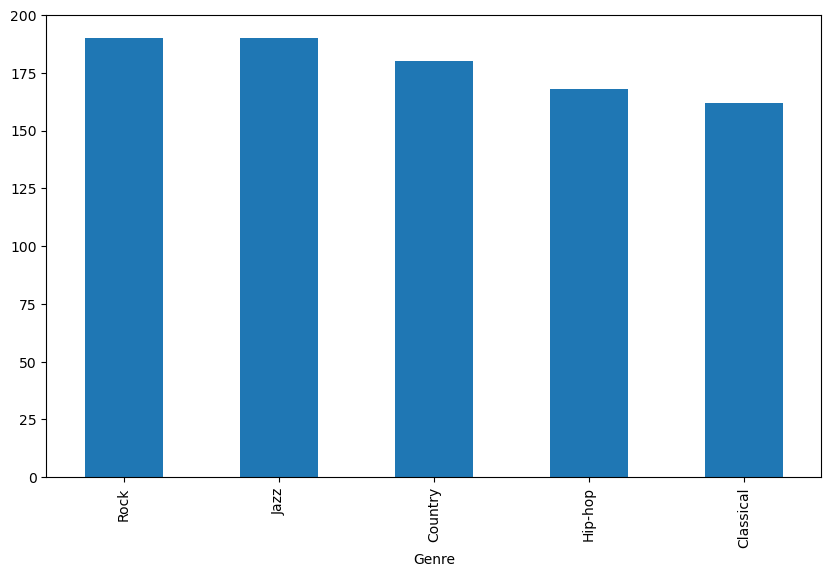

In [372]:
plt.figure(figsize=(10,6))
category_counts=data["Genre"].value_counts()
category_counts.plot(kind="bar",ylim=(0,200))

# check if we have balanced data 

In [373]:
total_sampels=data.shape[0]
list_of_sampels=data["Genre"].value_counts().values
print(list_of_sampels)
proportions=[]
for i in list_of_sampels:
    proportion=(i/total_sampels)
    proportions.append(proportion)
print(proportions)
balanced = all(np.isclose(proportions, proportions[0],atol=0.1))
print(f"if the data is balanced..? {balanced}")


[190 190 180 168 162]
[0.21348314606741572, 0.21348314606741572, 0.20224719101123595, 0.18876404494382024, 0.18202247191011237]
if the data is balanced..? True


In [374]:
data.describe()

,index,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,485.144944,120.968758,46.622936,51.710765,55.031680,58.211323,49.184925,54.879728,76.685443,47.413657,47.144869,51.247410,49.069627
std,282.468152,19.686122,17.964083,28.977883,29.267789,29.967194,33.206693,29.760746,18.678891,32.405720,32.188425,29.432091,29.335721
min,0.000000,50.494818,-4.165724,0.408370,0.598517,0.217449,-29.990605,0.146433,18.995222,0.047202,0.000000,0.008879,0.254396
25%,243.250000,107.894390,33.964277,26.633202,30.498273,31.565870,22.670425,29.768317,63.359784,11.665296,14.278911,25.941692,23.160076
50%,479.500000,121.042383,46.352302,52.550217,54.956635,59.273078,50.463488,56.086125,75.276219,52.785117,50.532543,53.107155,48.820221
75%,734.500000,134.937458,58.748546,76.885738,79.354533,83.897759,75.585254,78.796924,89.971576,75.583646,75.495647,77.796041,75.623216
max,999.000000,175.982637,104.932942,109.643123,114.949678,119.991892,119.728293,119.699889,139.019351,99.586429,100.000000,99.730374,99.958673


![alt text](image-1.png)

In [375]:
encoder = LabelEncoder()
encoded_data=data.drop(["Genre","Distorted Guitar","index"],axis=1)
y=encoder.fit_transform(data[["Genre"]])
encoded_data["genre_encoded"]=y
encoded_data


c:\Users\arwah\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,genre_encoded
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,71.753088,96.439665,53.771763,1
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.000000,17.327295,15.017146,0
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,87.692110,95.125207,25.308020,4
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,76.239108,97.016998,96.893109,2
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,23.381542,53.753793,30.142986,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,133.807084,43.093084,88.711355,38.195402,25.365896,87.613700,74.603838,87.775499,19.389458,74.576379,59.205448,2
886,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,6.729019,82.042218,43.590027,0
887,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,96.043437,5.499350,74.604889,4
888,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,55.119045,21.781372,24.716517,4


In [376]:
encoded_data.isnull().sum()

Tempo                          0
Dynamics Range                 0
Vocal Presence                 0
Percussion Strength            0
String Instrument Detection    0
Electronic Element Presence    0
Rhythm Complexity              0
Drums Influence                0
Metal Frequencies              0
Ambient Sound Influence        0
Instrumental Overlaps          0
genre_encoded                  0
dtype: int64

In [377]:
y

array([1, 0, 4, 2, 1, 4, 2, 1, 1, 1, 0, 2, 2, 4, 2, 4, 3, 0, 4, 2, 1, 0,
       1, 3, 3, 4, 3, 4, 2, 1, 4, 1, 4, 0, 0, 3, 0, 3, 4, 0, 3, 1, 3, 1,
       2, 1, 4, 1, 4, 0, 1, 1, 0, 3, 2, 4, 4, 1, 2, 0, 1, 1, 0, 3, 1, 3,
       4, 2, 2, 3, 0, 2, 1, 3, 2, 2, 0, 2, 3, 1, 0, 4, 3, 2, 0, 2, 3, 1,
       1, 0, 4, 1, 3, 2, 3, 4, 1, 1, 4, 0, 0, 1, 3, 3, 4, 4, 2, 0, 0, 1,
       3, 4, 3, 2, 3, 1, 0, 2, 1, 0, 2, 4, 4, 3, 1, 2, 4, 1, 2, 1, 2, 1,
       0, 2, 1, 2, 4, 3, 2, 1, 3, 1, 4, 1, 0, 1, 2, 2, 2, 1, 1, 2, 3, 4,
       1, 2, 2, 4, 4, 2, 0, 3, 4, 4, 1, 4, 1, 2, 3, 0, 3, 4, 4, 4, 3, 0,
       4, 0, 4, 3, 3, 2, 3, 4, 0, 1, 1, 4, 3, 2, 1, 1, 3, 2, 4, 1, 0, 2,
       1, 4, 0, 2, 2, 4, 0, 2, 3, 0, 0, 2, 4, 2, 3, 3, 4, 2, 3, 1, 1, 0,
       3, 2, 4, 3, 2, 3, 1, 4, 3, 3, 0, 3, 4, 3, 0, 4, 4, 3, 1, 1, 4, 0,
       3, 2, 3, 3, 1, 0, 3, 1, 3, 4, 3, 3, 2, 1, 3, 2, 0, 4, 4, 1, 3, 2,
       3, 4, 1, 3, 4, 3, 1, 0, 4, 3, 0, 2, 2, 0, 4, 2, 4, 2, 1, 1, 0, 3,
       2, 4, 2, 1, 3, 4, 1, 2, 0, 4, 2, 4, 3, 3, 4,

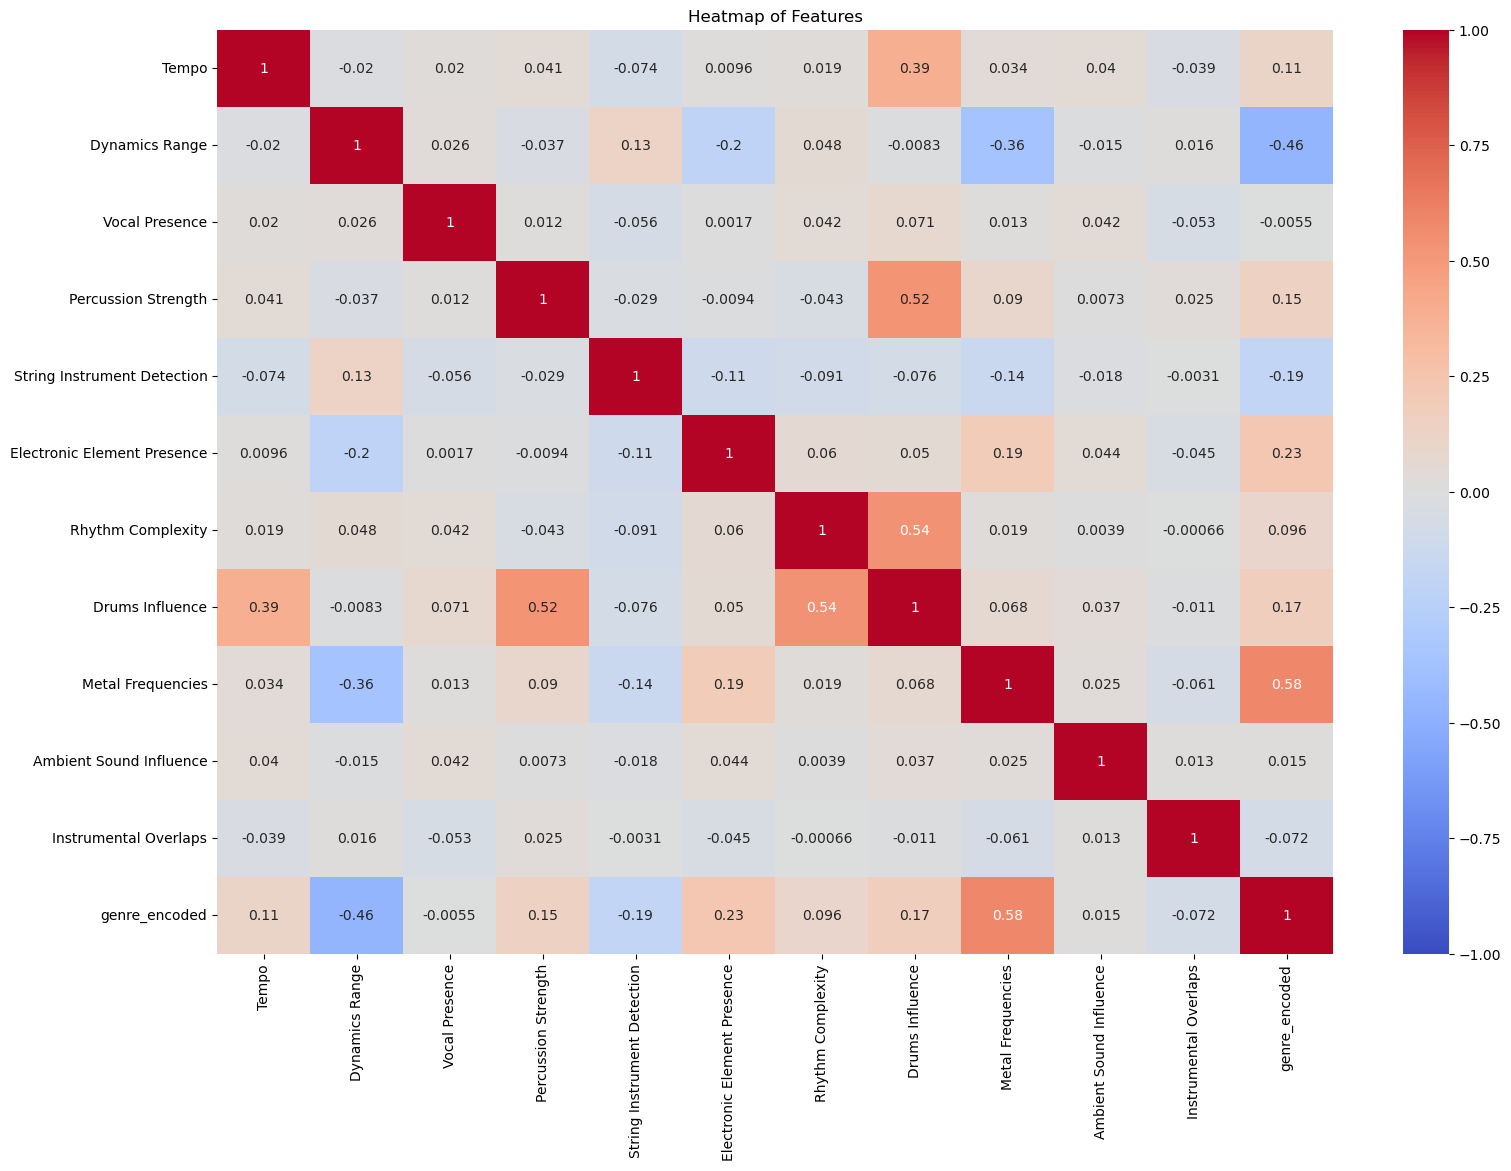

In [378]:
correlation_matrix = encoded_data.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',vmax=1,vmin=-1)
plt.title('Heatmap of Features')
plt.show()


# correlation between features 
1. Strong Correlations to Consider (|r| > 0.5):
- Distorted Guitar & Metal Frequencies (0.97) - extremely high correlation
- Drums Influence & Rhythm Complexity (0.54)
- Drums Influence & Percussion Strength (0.52)

2. Key Decision Rules:
- ***When two features are highly correlated (like Distorted Guitar & Metal Frequencies at 0.97), you should typically keep one and remove the other to avoid redundancy**
***- Features with very low correlation to all others (like Ambient Sound Influence) might be worth keeping if they capture unique information**
- Look for features that have moderate correlations with your target variable (if you have one)

Recommendations:
1. For the Distorted Guitar/Metal Frequencies pair:
   - Keep only one of them (they're essentially measuring the same thing)
   - Choose based on which is easier to measure or more interpretable

2. Consider keeping:
   - Drums Influence (it has meaningful correlations with several features)
   - Percussion Strength
   - Rhythm Complexity
   - Electronic Element Presence (has unique correlations)
   - String Instrument Detection
   - Vocal Presence (relatively independent)
   - Ambient Sound Influence (very independent)

This is considered good practice because features with moderate or low correlations often provide unique information that could be valuable for your model.


***ok what is redundancy you mention when talking about feature with strong relation ?**
Redundancy in feature selection means having multiple features that essentially carry the same or very similar information, which can be problematic for several reasons:
Let me explain using your heatmap example with Distorted Guitar and Metal Frequencies (correlation = 0.97):

Why it's redundant:
If Distorted Guitar increases, Metal Frequencies almost always increases too (0.97 correlation)
They're basically telling you the same story in different words
Like having temperature in both Celsius and Fahrenheit - they're different measures of the same thing


Problems caused by redundancy:


Wastes computational resources (you're processing the same information twice)
Can make some machine learning models less effective
May give too much weight to essentially the same information
Can lead to multicollinearity issues in statistical models




# PCA for dimensionality reduction 

In [389]:
x=data.drop(["Genre","index"],axis=1)
y=data["Genre"]


In [380]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)

In [381]:
pca=PCA()
X_pca=pca.fit_transform(X_scaled)

In [382]:
explained_var=pca.explained_variance_ratio_
explained_var

array([0.20063071, 0.15062807, 0.09369199, 0.08696907, 0.08536054,
       0.08167379, 0.07948271, 0.07613474, 0.07000221, 0.05996203,
       0.01267309, 0.00279105])

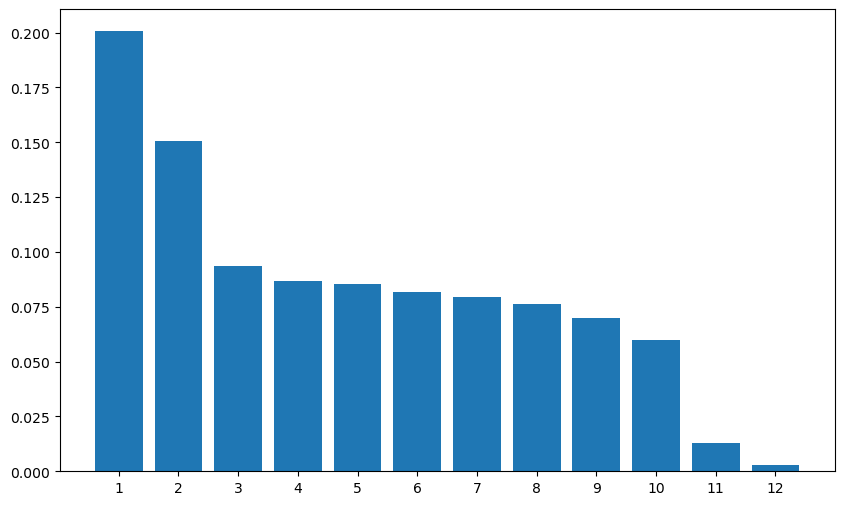

In [383]:
plt.figure(figsize=(10,6))
components=["1","2","3","4","5","6","7","8","9","10","11","12"]
plt.bar(components,explained_var)
plt.xlabel="components"
plt.ylabel="variance"
plt.show()

TypeError: 'str' object is not callable

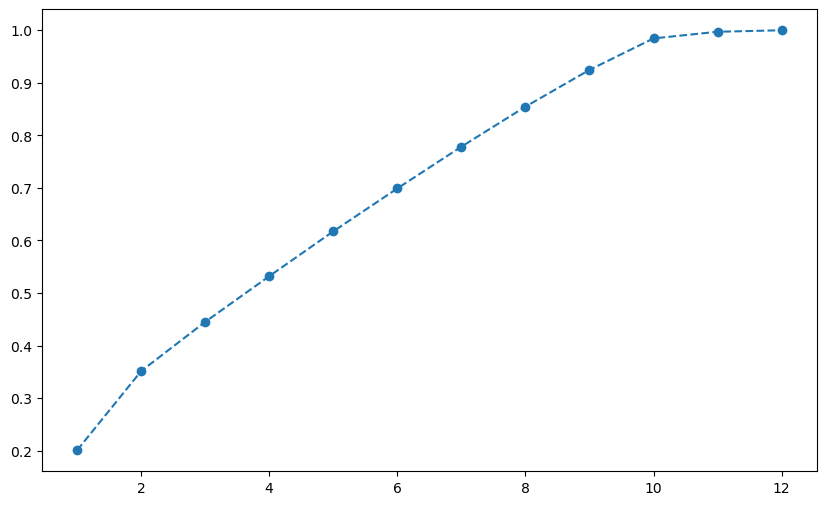

In [384]:
plt.figure(figsize=(10,6))
plt.plot(range(1,13),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle="--")
plt.xlabel("princple components")
plt.ylabel("variance by principal component")
plt.show() 

In [388]:
pca_l=PCA(n_components=8)
X_pca=pca.fit_transform(X_scaled)

# Evaluating classificastion PCA transformation vs Orginal Data

In [ ]:
pca_data=pd.DataFrame(data=pca_l.components_,
                      index=["component_1","component_2","component_3","component_4","comonent_5","component_6","component_7"],
                      columns=encoded_data.columns.values)
pca_data

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,genre_encoded
component_1,0.064760,-0.196659,0.077165,0.165407,-0.348339,0.598644,0.208361,0.166178,0.593377,0.095058,-0.107230,0.021040
component_2,0.116773,0.102896,0.194759,0.459107,-0.144464,-0.352347,0.588432,0.438622,-0.176725,0.031938,0.105611,-0.001368
component_3,0.020700,-0.102229,-0.138435,0.605136,0.094628,-0.366725,-0.511279,0.031148,0.433364,-0.068912,0.072796,0.009834
component_4,-0.030243,-0.007221,-0.602234,0.137123,0.101836,0.321914,0.107507,0.069333,-0.142212,-0.105335,0.675173,-0.001594
comonent_5,0.017348,0.016190,0.228122,0.074264,-0.010841,0.071714,-0.214921,-0.034020,-0.126714,0.883077,0.305575,-0.004123
component_6,0.022430,0.056738,-0.046960,0.325813,0.702284,0.368629,0.035007,0.165083,-0.180788,0.100703,-0.433030,-0.003100
component_7,-0.005291,0.048815,0.479810,0.307539,-0.247835,0.362484,-0.367957,-0.017831,-0.421000,-0.383017,0.142326,-0.007967


In [391]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, encoded_data["genre_encoded"], test_size=0.3, random_state=42)

In [392]:
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [394]:

y_pred = classifier.predict(X_test)
print("Accuracy with PCA:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))

Accuracy with PCA: 0.5318352059925093

Classification Report:
               precision    recall  f1-score   support

   Classical       0.86      1.00      0.93        51
     Country       0.33      0.25      0.29        52
     Hip-hop       0.45      0.46      0.45        48
        Jazz       0.44      0.39      0.41        62
        Rock       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.52      0.54      0.52       267
weighted avg       0.51      0.53      0.52       267



# logstic regression with Scaled orginal_data

In [395]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, encoded_data["genre_encoded"], test_size=0.3, random_state=42)

In [397]:
logreg_orig = LogisticRegression(max_iter=10000)
logreg_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = logreg_orig.predict(X_test_orig)
print("Accuracy with Original Features:", accuracy_score(y_test_orig, y_pred_orig))
print("\nClassification Report with Original Features:\n", classification_report(y_test_orig, y_pred_orig, target_names=encoder.classes_))

Accuracy with Original Features: 0.5318352059925093

Classification Report with Original Features:
               precision    recall  f1-score   support

   Classical       0.86      1.00      0.93        51
     Country       0.33      0.25      0.29        52
     Hip-hop       0.45      0.46      0.45        48
        Jazz       0.44      0.39      0.41        62
        Rock       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.52      0.54      0.52       267
weighted avg       0.51      0.53      0.52       267

